[< __INTRO MODULE 4__](../Introduction.ipynb)

---

## Introduction

First of all, it should be noted that a common problem within the IT field is having to deal with the number of anachronisms that exist, in fact, an old anecdote tells that the programming industry is based on `TLA` (__Three Letter Acronyms__). However, JSON breaks with this tradition, since it is an acronym for `JavaScript Object Notation`.

JSON, while intended for JavaScript use, is a universal format for transferring information that is part of an object between different systems.

JSON defines a system for representing objects that can be sent over the network.

It does this by doing the following:
- It uses UTF-8 to encode text.
    - Is human readable
    - Does not depend on a third party to read it
- Defines a system for representing object relationships
- In the main layers it works as a dictionary
- Each value can be an object, an array, a number, a string, a boolean, or null.

Here is an example of a json:
```json
  {
    "name": "John",
    "age": 30,
    "cars": {
      "car1": "Ford",
    }
  }
```

---

## JSON datatype

JSON supports the following data types:
- __Integers__: Are write as a number (`123`)
  - Only numbers from base 10 are supported (no hexadecimal, octal, etc.)
  - Negative numbers are supported by using the `-` sign
  - Positive numbers don't need the `+` sign
- __Real numbers__: Are written as a number with a decimal point (`123.45`)
  - Negative numbers are supported by using the `-` sign
  - Positive numbers don't need the `+` sign
- __Strings__: Are written as a string (`"Hello World"`)
  - Are enclosed in double quotes
  - Can't be split across multiple lines
  - Can contain any character, including escape characters
    - 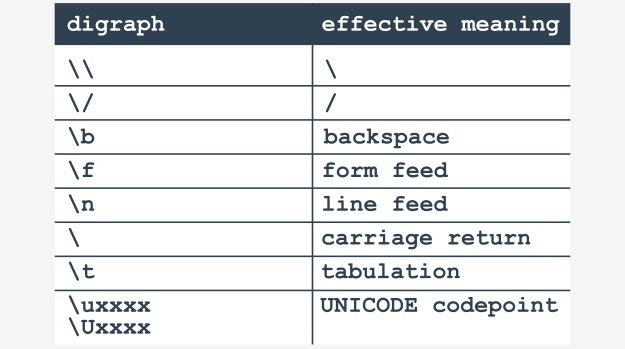
- __Boolean__: Are written as `true` or `false`
- __None__: Are written as `null`
- __Array__: Are written as a list of values separated by commas and enclosed in square brackets (`[1, 2, 3]`)
  - Can contain any data type
  - Can be empty (`[]`)
- __Object__: A set of properties separated by comas and with format key:value (`{"key1": "value1", "key2": "value2"}`)
  - Can contain any data type
  - Can be empty (`{}`)
  - No name restrictions

---

## Using JSON in Python

Python has a built-in package called `json`, which can be used to work with __JSON objects__, in particular, this module is able to transform these objects into data that Python knows how to interpret.

The functions of this module are the following:
- `dumps`: Generates a JSON in String format from the argument sent.
- `loads`: Translates a String in JSON format from the argument sent.

__NOTE__: For both methods, if the final `s` is not included, instead of working with Strings the module will work with files.

The module defines the following conventions before performing the transformation between Python and JSON:

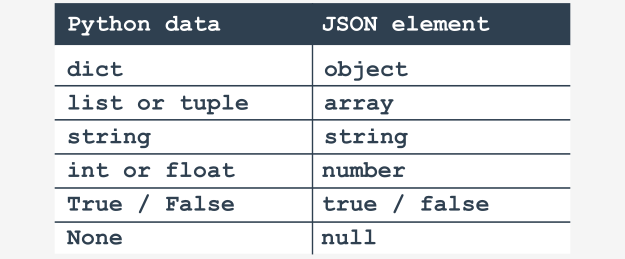

---

## Limitations

If you look at the "Python data" column in the table above, the JSON module does not have a translation for objects.

Moreover, let's see what happens when transforming an object:

In [1]:
import json

class Person:
    def __init__(self, name: str, age: int) -> None:
        self.name: name
        self.age: age

obj = Person("John", 10)

json.dumps(obj)

TypeError: Object of type Person is not JSON serializable

As you can see, JSON raises a TypeError.

`TypeError: Object of type Person is not JSON serializable`.

One __trap__ that could be done is instead of generating a JSON with the properties of the object instead of the object itself.

That is to say:

In [3]:
import json

class Person:
    def __init__(self, name: str, age: int) -> None:
        self.name = name
        self.age = age

obj = Person("John", 10)

json.dumps(obj.__dict__)

'{"name": "John", "age": 10}'


---

## A cleaner way to encode/decode objects

The JSON methods that allow for Python to JSON conversions have arguments that can receive callbacks with which to pre-encode the received argument, so that they convert that value to a JSON-interpretable one.

The arguments for each method are as follows:
- __`dumps`__ > `default` > `default`.
- __`loads`__ > `object_hook`.

The following is an example where these arguments are used to transform an object:

In [4]:
import json


class Who:
    def __init__(self, name, age):
        self.name = name
        self.age = age


def encode_who(w):
    if isinstance(w, Who):
        return w.__dict__
    else:
        raise TypeError(w.__class__.__name__ + 'is not JSON serializable')


def decode_who(w):
    return Who(w['name'], w['age'])


old_man = Who("Jane Doe", 23)
json_str = json.dumps(old_man, default=encode_who)
new_man = json.loads(json_str, object_hook=decode_who)
print(type(new_man))
print(new_man.__dict__)

<class '__main__.Who'>
{'name': 'Jane Doe', 'age': 23}



---

## Creating or own JSON custom class

The JSON module has the `JSONencoder` and `JSONdecoder` classes which we can play with to generate our own custom classes to encode and decode JSONs.

The creation of custom classes to encode and decode objects and JSON is shown below:

In [ ]:
import json


class Who:
    def __init__(self, name, age):
        self.name = name
        self.age = age


class MyEncoder(json.JSONEncoder):
    def default(self, w):
        if isinstance(w, Who):
            return w.__dict__
        else:
            return super().default(self, w)


class MyDecoder(json.JSONDecoder):
    def __init__(self):
        json.JSONDecoder.__init__(self, object_hook=self.decode_who)

    def decode_who(self, d):
        return Who(**d)


some_man = Who('Jane Doe', 23)
json_str = json.dumps(some_man, cls=MyEncoder)
new_man = json.loads(json_str, cls=MyDecoder)

print(type(new_man))
print(new_man.__dict__)



---

## XML, the predecessor of JSON

XML (another TLA), stands for `eXtendable Markup Language`.

XML is a language write it in plain text. Anyway, this is what it thinks about itself. Note – it isn't a programming language, and although it is possible to build a real programming language on top of XML, it wasn't (and still isn't) its native niche. XML is – like JSON – a universal and transparent carrier of any type of data.

Take a look – it's a simple sample XML document and deconstruct it:
```xml
    <?xml version = "1.0" encoding = "utf-8"?>
    <!-- cars.xml - List of cars ready to sell -->
    <!DOCTYPE cars_for_sale SYSTEM "cars.dtd">
    <cars_for_sale>
    <car>
        <id>1</id>
        <brand>Ford</brand>
        <model>Mustang</model>
        <production_year>1972</production_year>
        <price currency="USD">35900</price>
    </car>
    <car>
        <id>2</id>
        <brand>Aston Martin</brand>
        <model>Rapide</model>
        <production_year>2010</production_year>
        <price currency="GBP">32000</price>
    </car>
    </cars_for_sale>
```

#### Deconstruction of the definition lines:
- `<?xml>`: The first line declares that it's an XML document:
    - `<?xml version = "1.0" encoding = "utf-8"?>`
- `<.. arg = "val" ..>`: Inside each header there can be attributes that helps to tell something about its value (we can add as many as we need):
    - `version = "1.0" encoding = "utf-8"`
    - `currency="USD"`
- `<!-- comment -->`: All comments start with `<!--` and end with `-->`
    - `<!-- cars.xml - List of cars ready to sell -->`
- `<!DOCTYPE ..>`: Optional line that tells the properties from this XML in a DTD file writed in SGML and helps to parse it
    - `<!DOCTYPE cars_for_sale SYSTEM "cars.dtd">`
    - Location of "`cars.dtd`": Doctypes can be added inside the XML document or anywhere (in other server, folder, ...)
    - `SYSTEM`: Can be SYSTEM/PUBLIC:
        - SYSTEM: Used privately and only needs the URI (location) from the DTD
        - PUBLIC: Used publicly and needs its FPI (unique ID) and its URI (location).
- 
    

> - __FPI (Formal Public Identifier)__: A unique identifier for a DTD (Document Type Definition) in XML/SGML, distinguishing it universally. Used with a URI to locate and identify the DTD publicly.
> - __URI (Uniform Resource Identifier)__: A generic term for all types of names and addresses that refer to objects on the web. It can be classified into two categories: URLs and URNs.<br>
> - __URL (Uniform Resource Locator)__: A specific type of URI that not only identifies a resource but also provides the means to locate it by describing its primary access mechanism (e.g., its network location). It typically includes a scheme, host, and often a path to a resource.


#### The content of the XML

The XML document consists of elements. Each element is marked by a pair of tags: an opening tag and a closing tag. Both tags look nearly identical, but the closing tag's name starts with /. Tags can be easily identified as they are enclosed inside < and >.

This means that the element named CuriousTag starts where the following tag is placed:

`<CuriousTag>`Value`</CuriousTag>`.

Undefined elements can be set in two ways:

- __Empty__: `<empty></empty></empty>`
- __Absent__: `<empty/>`

If we look again at the example above we can see that the content of a TAG can be either a value or another TAG. This leads us to state that a tag can nest another tag and so on.

For example, if we look at the example document we can see that all the XML values are contained within the `<cars_for_sale>` tag and that the content of that entity is initially made up of `<car>`.

```xml
    ...
    <cars_for_sale>`.
    <car>
        ...
    </car>
    <car> ...
        ...
    </car>
    </cars_for_sale>
```

The properties of each record are stored inside the `car` property.

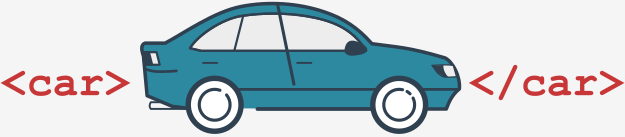

The best way to model an XML is throw a __tree__ structure, in concrete, one called __graph__:

An example of how it will look it will be the following:
```
    cars_for_sale
    |
    |____ car
    |     |_ id:1
    |	 |_ brand: Ford
    |	 |_ model: Mustang
    |	 |_ production_year: 1972
    |	 |_ price(USD): 35900
    |
    |____ car
        |_ id:2
        |_ brand: Aston Martin
        |_ model: Rapide
        |_ production_year: 2010
        |_ price(GPB): 32500
```

---

## Parsing throw python a XML file

As expected, python has a build-in module called `xml` that allows to parse XML in tree format.

Here is an example where we parse the example above with python:

In [14]:
from io import BytesIO
from xml.etree.ElementTree import parse

XML = b"""<?xml version = "1.0" encoding = "utf-8"?>
<!-- cars.xml - List of cars ready to sell -->
<cars_for_sale>
<car>
    <id>1</id>
    <brand>Ford</brand>
    <model>Mustang</model>
    <production_year>1972</production_year>
    <price currency="USD">35900</price>
</car>
<car>
    <id>2</id>
    <brand>Aston Martin</brand>
    <model>Rapide</model>
    <production_year>2010</production_year>
    <price currency="GBP">32000</price>
</car>
</cars_for_sale>
"""

cars_for_sale = parse(BytesIO(XML)).getroot()
print(cars_for_sale.tag)
for car in cars_for_sale.findall('car'):
    print('\t', car.tag)
    for prop in car:
        print('\t\t', prop.tag, end='')
        if prop.tag == 'price':
            print(prop.attrib, end='')
    print(' =', prop.text)


cars_for_sale
	 car
		 id		 brand		 model		 production_year		 price{'currency': 'USD'} = 35900
	 car
		 id		 brand		 model		 production_year		 price{'currency': 'GBP'} = 32000



You can also change the XML (for example adding a car) throw python:

In [15]:
from io import BytesIO
from uuid import uuid4
from xml.etree.ElementTree import parse, Element, SubElement


def print_xml(xml: Element) -> None:
    print(xml.tag)
    for car in xml.findall('car'):
        print('\t', car.tag)
        for prop in car:
            print('\t\t', prop.tag, end='')
            if prop.tag == 'price':
                print(prop.attrib, end='')
        print(' =', prop.text)


# Parsing the car stock
XML = b"""<?xml version = "1.0" encoding = "utf-8"?>
<!-- cars.xml - List of cars ready to sell -->
<cars_for_sale>
<car>
    <id>1</id>
    <brand>Ford</brand>
    <model>Mustang</model>
    <production_year>1972</production_year>
    <price currency="USD">35900</price>
</car>
<car>
    <id>2</id>
    <brand>Aston Martin</brand>
    <model>Rapide</model>
    <production_year>2010</production_year>
    <price currency="GBP">32000</price>
</car>
</cars_for_sale>
"""
car_stock = parse(BytesIO(XML)).getroot()

print("Document original:".center(50, "*"))
print_xml(car_stock)
print("*"*30)

# Creating a new car element
new_car = Element('car')
SubElement(new_car, 'id').text = str(uuid4())
SubElement(new_car, 'brand').text = 'Maserati'
SubElement(new_car, 'model').text = 'Mexico'
SubElement(new_car, 'product_year').text = '1970'
SubElement(new_car, 'price', {'currency': 'EUR'}).text = '61800'

# Adding the new element into the list
car_stock.append(new_car)
print("Document edited".center(50, "*"))
print_xml(car_stock)

print("*"*50)

Document original:
cars_for_sale
	 car
		 id		 brand		 model		 production_year		 price{'currency': 'USD'} = 35900
	 car
		 id		 brand		 model		 production_year		 price{'currency': 'GBP'} = 32000
******************************
*******Document edited********
Current state document:
cars_for_sale
	 car
		 id		 brand		 model		 production_year		 price{'currency': 'USD'} = 35900
	 car
		 id		 brand		 model		 production_year		 price{'currency': 'GBP'} = 32000
	 car
		 id		 brand		 model		 product_year		 price{'currency': 'EUR'} = 61800
******************************



---

[< __INTRO MODULE 4__](../Introduction.ipynb)